<a href="https://colab.research.google.com/github/WilmeGR/ml-arbol-decisiones/blob/main/Modelo_Arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# **Verificacion de datos**

In [569]:
#Leer y mostrar csv
df = pd.read_csv('drive/MyDrive/curso/car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [570]:
unique = df[0].unique()
print(unique )

['vhigh' 'high' 'med' 'low']


In [571]:
#Evaluar el  shape
df.shape

(1728, 7)

In [572]:
#Renombrar columnas
col_names = ['compra','mantenimiento','puertas','personas','maletero','seguridad','clase']
df.columns = col_names
df.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [573]:
#Vizualizacion de tipos de datos
df.dtypes

compra           object
mantenimiento    object
puertas          object
personas         object
maletero         object
seguridad        object
clase            object
dtype: object

In [574]:
#Verificar cantidad en cada calse
df['clase'].value_counts()

clase
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [575]:
#Verificar nulos
df.isna().sum()

compra           0
mantenimiento    0
puertas          0
personas         0
maletero         0
seguridad        0
clase            0
dtype: int64

In [576]:
df.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## **Procesamiento de datos**

In [577]:
#Separacion de X e Y para entrenamiento de modelo
X = df.drop(['clase'],axis =1)
y = df['clase']

In [578]:
#Codificacion de datos para X
ordinal_encoder = OrdinalEncoder(dtype=int)
X[X.select_dtypes(include=['object']).columns] = ordinal_encoder.fit_transform(X.select_dtypes(include=['object']))
X.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [579]:
#Codificacion de datos para y
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 3])

In [580]:
#Dividir en regla 30% test y 70% train
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state= 42)

In [581]:
#Verificacion de division de datos en X
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [582]:
#Verificacion de division de datos en y
y_train.shape, y_test.shape

((1209,), (519,))

In [583]:
X_train.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad
1178,2,2,3,1,0,0
585,0,0,1,2,2,1
1552,1,2,1,1,1,2
1169,2,2,3,0,0,0
1033,2,0,2,0,0,2


In [584]:
X_train.dtypes

compra           int64
mantenimiento    int64
puertas          int64
personas         int64
maletero         int64
seguridad        int64
dtype: object

# **Entrenamiento del modelo de clasificacion**

In [585]:
#instanciar el modelo y realizar el fit de train
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [586]:
y_pred_test = tree_model.predict(X_test)

In [587]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Exactitud del modelo en test: {accuracy_test:.2f}%")

Exactitud del modelo en test: 0.96%


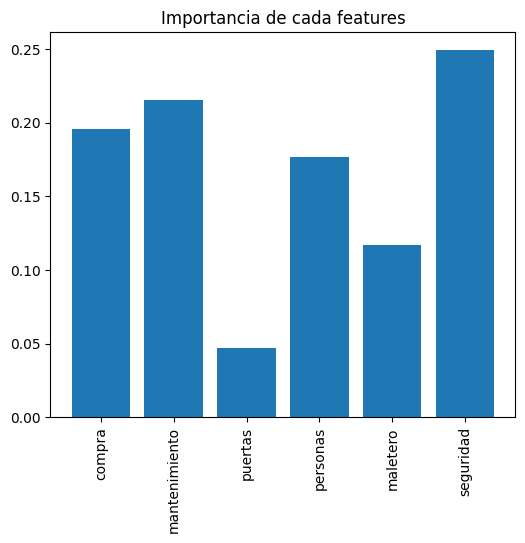

In [588]:
#Verificacion de feature importances
importances = tree_model.feature_importances_
columns = X.columns
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlabel=('Features')
ax.bar(columns,importances,width=0.8)
ax.set_title ('Importancia de cada features')
plt.xticks(rotation=90)
plt.show()


In [589]:
def predecir_compra(nueva_data):
    global le, ordinal_encoder, tree_model
    nueva_data_oe = ordinal_encoder.transform([nueva_data])
    prediccion = tree_model.predict(nueva_data_oe)
    clase = le.inverse_transform(prediccion)
    if clase[0] == 'unacc':
        print('Esta compra no es aceptable')
    elif clase[0] == 'acc':
        print('Esta compra es un poco aceptable')
    elif clase[0] == 'good':
        print('Esta compra es buena')
    else:
        print('Esta compra es muy buena')

In [590]:
new_data = ['vhigh','vhigh','2','2','small','low']
predecir_compra(new_data)

Esta compra no es aceptable
